In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
images = []
img_folder = "../1-raw-data/ndvi/"

for input in ['img_list.txt', 'autoselected_images.txt']:
    with open(img_folder + input) as f:
        for l in f:
            l = l.replace("\n", "")
            id = l.split(',')[1]
            if os.path.exists(img_folder + id + "_ndvi.TIF"):
                images.append([l.split(',')[0], id])


In [3]:
time =[pd.to_datetime(i[0]).replace(tzinfo=None) for i in images]

In [4]:
out_folder = "../2-processed data/ndvi/"
stat_dataframes = []
for i in images:
    stat_dataframes.append(pd.read_csv(out_folder + i[1] + '.csv', names = ['count', 'mean'], skiprows=1))

landslide_data = np.array([d['count'] for d in stat_dataframes])

index = list(range(len(stat_dataframes[0]['count'])))

stat_dataframes[0].head()

,count,mean
0,1076,0.028924
1,7,0.031918
2,51,0.033401
3,41,0.107371
4,4,0.125787


In [5]:
 
means = [d['mean'].mean() for d in stat_dataframes]

Text(0.5, 1.0, 'ndvi over time')

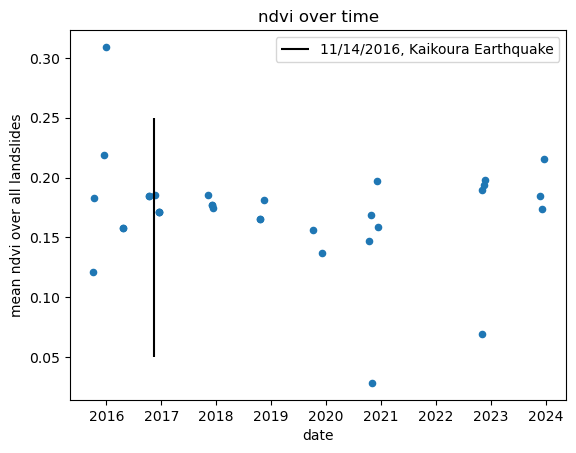

In [6]:
plotting_df = pd.DataFrame([[time[i], means[i]] for i in range(len(time))] )
ax = plotting_df.sort_values(by=0).plot.scatter(0, 1)

kaikoura_date = datetime.datetime(2016, 11, 14)

ax.vlines(kaikoura_date, .05, .25, color='black', label='11/14/2016, Kaikoura Earthquake')

ax.legend()

ax.set_xlabel('date')
ax.set_ylabel('mean ndvi over all landslides')
ax.set_title('ndvi over time')

# plotting_df.plot(1)

In [7]:


means = [(d['mean'][d['mean'] >0].mean()) for d in stat_dataframes]

Text(0.5, 1.0, 'ndvi over time')

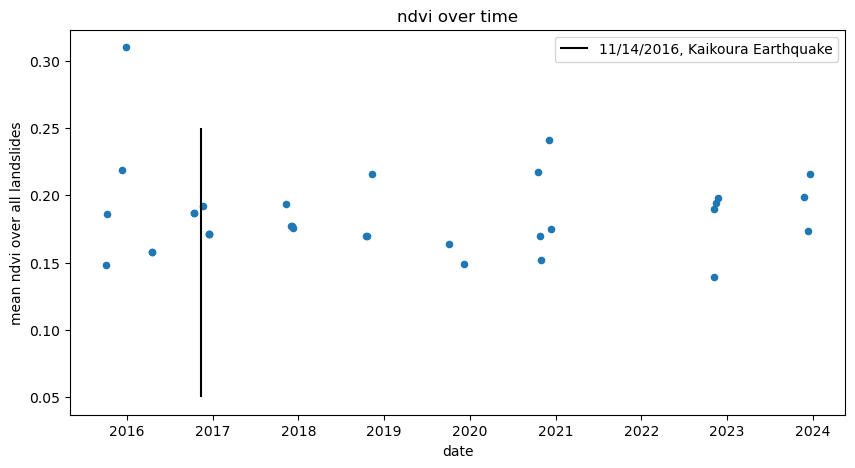

In [11]:
plotting_df = pd.DataFrame([[time[i], means[i]] for i in range(len(time))] )

f, ax = plt.subplots(figsize=(10, 5))
plotting_df.sort_values(by=0).plot.scatter(0, 1, ax=ax)

kaikoura_date = datetime.datetime(2016, 11, 14)

ax.vlines(kaikoura_date, .05, .25, color='black', label='11/14/2016, Kaikoura Earthquake')

ax.legend()


ax.set_xlabel('date')
ax.set_ylabel('mean ndvi over all landslides')
ax.set_title('ndvi over time')

# plotting_df.plot(1)